<a href="https://colab.research.google.com/github/rushikeshbhusari/Business-Case-Netflix--Data-Exploration-and-Visualization/blob/main/business_case_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/netflix.csv')

In [ ]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.shape

(8807, 12)

In [ ]:
data['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.isna().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
((data.isna().sum()/len(data))*100).round(2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

#Observation


*   29.91% data of director column contains null
*   9.37% data of cast column contains null.
*   9.44% data of country column contains null
*   0.11% data of data_added column contains null
*   0.05% data of rating column contains null
*   0.03% data of duration column contains null







#1. Data Cleaning
**1. Column-"director"**

In [ ]:
data["director"].isna().sum()

2634

2634 items of the director column are contains null values
#replacing all null values
**Approach** :- we will replace all NAN values of **director** column with **"Others"**

In [ ]:
data["director"] = data["director"].fillna("others")

In [ ]:
data["director"].isna().sum()

0

**2. Column- "cast"**

In [ ]:
data["cast"].isna().sum()

825

825 items of cast column are contains null values
#Replacing the null values
**Approach**:- Similar to the pervious approch will replace all NAN values od **cast** column with **"others"**

In [ ]:
data["cast"]=data["cast"].fillna("others")

In [ ]:
data["cast"].isna().sum()

0

**3. Column- "country"**

In [ ]:
data["country"].isna().sum()

831

Here 831 items of the director column are contains null values.

#Replacing the null values
**Approach:**- Imputing the **mode** of the **country** column is a strategy for addressing null values in that column.

In [ ]:
data["country"].mode()[0]

'United States'

Most common value in country column is **"United States"**

In [ ]:
data["country"]=data["country"].fillna(data["country"].mode()[0])

In [ ]:
data["country"].isna().sum()

0

**4.Column:- "date_added"**
there are two issue in the column.


1.   Datatype of the column has to be changed from **string (object) to datetime.**
2.   Null values.




In [ ]:
data["date_added"].dtype

dtype('O')

converting string (object) to datetime

In [ ]:
data["date_added"]=pd.to_datetime(data["date_added"])

In [ ]:
data["date_added"].dtype

dtype('<M8[ns]')

#Replacing the null values.
**Approach**:-  Imputing the  **mode** of the **date_added** column is a strategy for addressing null values in that column.

In [ ]:
data["date_added"].isna().sum()

10

Here 10 items of the date_added column are contains null values.



In [ ]:
data["date_added"].mode()[0]

Timestamp('2020-01-01 00:00:00')

In [ ]:
data["date_added"]=data['date_added'].fillna(data["date_added"].mode()[0])

In [ ]:
data["date_added"].isna().sum()

0

**5. Column "rating"**

In [ ]:
data["rating"].isna().sum()

4

Here 4 items of the rating column are contains null values.

#Replacing the null values.
**Approach**:-Imputing the mode of the **rating** column is a strategy for addressing null values in that column.

**let's see according to the type which is the most comman value in rating column.**

In [ ]:
data[data["type"]=="Movie"]["rating"].mode()[0]

'TV-MA'

In [ ]:
data[data["type"]=="TV Show"]["rating"].mode()[0]

'TV-MA'

Given that **the mode of the rating is consistent for both Movies and TV** Shows, null values can be substituted with **"TV-MA".**

In [ ]:

data["rating"]=data["rating"].fillna(data["rating"].mode()[0])


In [ ]:
data["rating"].isnull().sum()

0

**5. Column "duration"**

In [ ]:
data["duration"].isna().sum()

3

Here 3 items of the **duration** column are contains null values.

#Replacing the null values.
**Approach**:-Imputing the mode of the **duration **column is a strategy for addressing null values in that column.

**let's see according to the type which is the most comman value in duration column.**

In [ ]:
data[data["type"]=="Movie"]["duration"].isna().sum()

3

In [ ]:
data[data["type"]=="TV Shows"]["duration"].isna().sum()

0

**Observation**:- It is observed that only the Movies have null values and TV shows do not, Hence it would be meaningful to replace the null values of column duration with the mode of movie duration

In [ ]:
data[data["type"]=="Movie"]["duration"].mode()[0]

'90 min'

In [ ]:
data["duration"]=data["duration"].fillna(data[data["type"]=="Movie"]["duration"].mode()[0])

In [ ]:
data["duration"].isna().sum()

0

**Let's see Data Cleaning is complete or not.**

In [ ]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#Observation :- All the null values are taken care of
 **Note**: The column description is not significant for this type of analysis, Hence it can be dropped

In [ ]:
data.drop("description",axis=1,inplace=True)

# 2. Handling inconsistent or incorrect data
**Rating column has incorrect data**

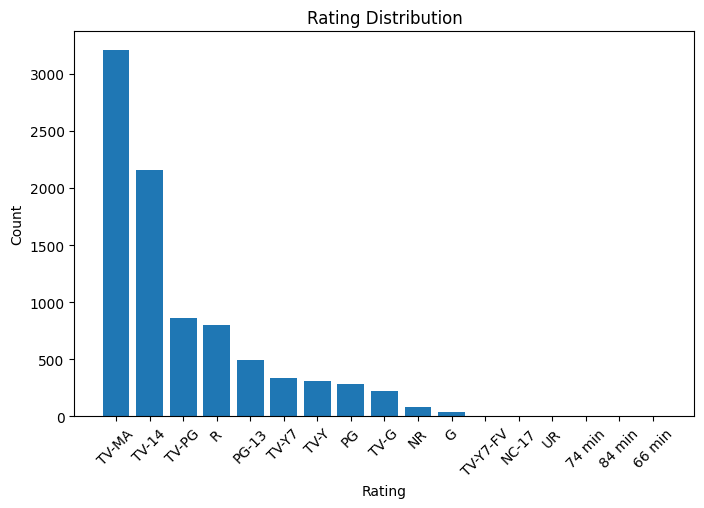

In [ ]:
x_bar=data['rating'].value_counts().index
y_bar=data['rating'].value_counts().values

#Creating bar plot
plt.figure(figsize=(8,5))
plt.bar(x_bar,y_bar)

#Adding label
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")

#Rotating X-axis label to 45 degree
plt.xticks(rotation=45)

#Display the plot
plt.show()

We see three unwanted values entered: **'74 min', '84 min', '66 min'**


1.   We can eliminate these with the values to 'UR'; Because UR means, Unrated



In [ ]:
#changing '74 min', '84 min', '66 min' values to UR
data["rating"]=np.where(np.isin(data['rating'], ['74 min', '84 min', '66 min']), 'UR', data['rating'])

#All incorrect data changes to "UR"

data["rating"].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
UR             6
TV-Y7-FV       6
NC-17          3
Name: rating, dtype: int64

#Data Visualisation

# **1.   Content Types**





**1.   First, let's look at the percentage of movies and TV shows in the dataset.**



In [ ]:
data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

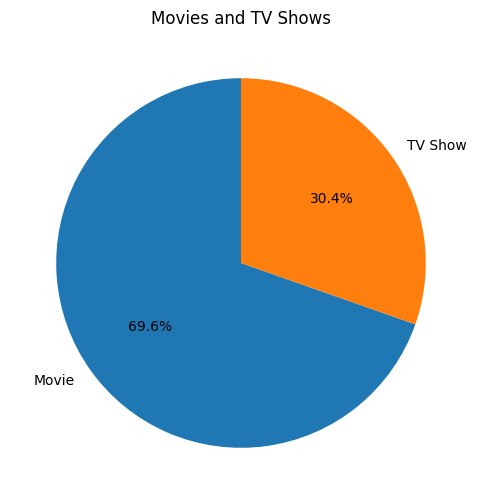

In [ ]:
type_counts=data["type"].value_counts()
total_shows=type_counts.sum()

#calculate proportation
proportion= type_counts/total_shows

#Plotting the pie chart

plt.figure(figsize=(6, 6))
plt.pie(proportion,labels=proportion.index,autopct='%1.1f%%',startangle =90 )
plt.title("Movies and TV Shows")

plt.show()

**Observation**


*   We can see, Most of the content tends towards movies with 69.6% and others, TV Shows 30.4%.





# 2. Rating Analysis


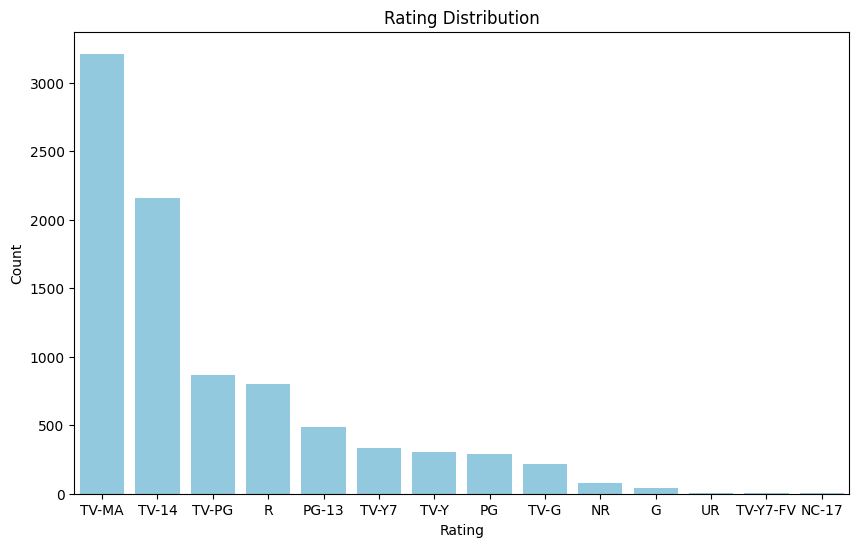

In [ ]:
#Count the occurrences of each ratings.
rate=data['rating'].value_counts().reset_index()

#Creat a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rate,x=rate["index"],y=rate["rating"],color="skyblue")

#Adding Labels and titels
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")


#Display the plot
plt.show()

**Observations**

*   Most used ratings TV-MA, TV-14, TV-PG is used in tv show.
*   That means Tv shows mostly for Mature or 14+.
*   R rating in fourth place used in Movies.
*   That means Movies in Netflix mostly for Mature.
*   We can say Netflix better place for adult, and mature content.




In [ ]:
# Rename "listed_in" column to "Genres"
data.rename({"listed_in":"Genres"},axis=1,inplace=True)
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


# 3. Popular Genres


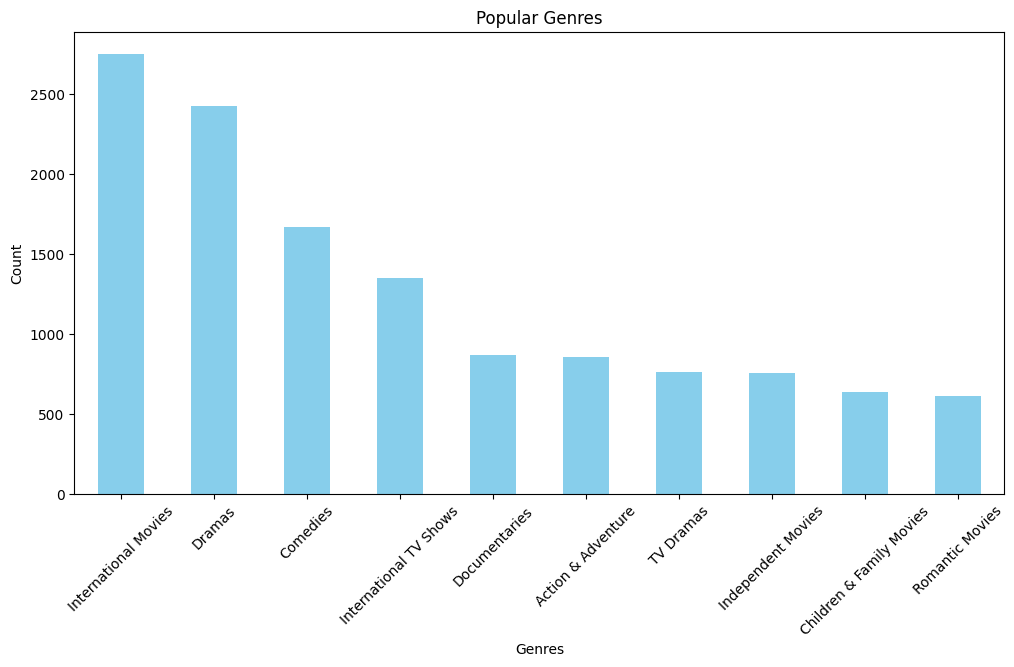

In [ ]:
#Extract the genres
split_genres=data["Genres"].str.split(", ").explode()

#count the genres
genres_count=split_genres.value_counts()

#Select top  genres
top_genres=genres_count.head(10)

#Creating bar plot
plt.figure(figsize=(12,6))
top_genres.plot(kind="bar",color="skyblue")

#Adding labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title("Popular Genres")

#Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

#Display the plot
plt.show()

#INSIGHTS


*   Most Content in Netflix is (International Movies, Dramas and Comedies)
*   There is international Movies and Tv shows in top five, and I think this is good for Netflix. We can say, Netflix has users around the world.

*   If we look just regular genres; Drama is first. Because drama mostly related almost every other genre. There's not a lot movies or TV Shows pure Drama.
*   Other Coming genre is Comedies, and this is I think Obvious, because real world losing funniness. We need to laugh more.





# 4. Popularity - Column : Country
Lets's see how Tv Show and Movies trend is going in different countries

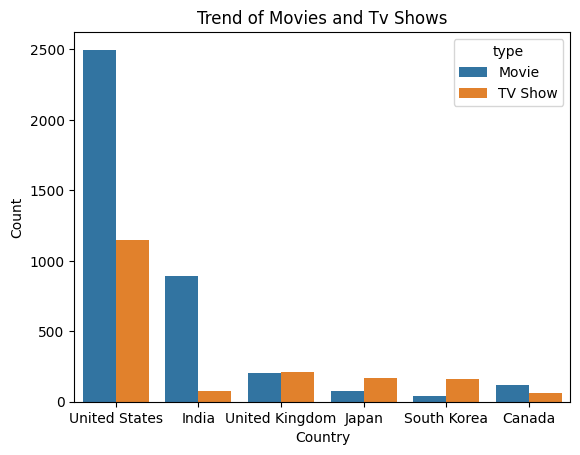

In [ ]:
#Creating bar plot
sns.countplot(data=data,x="country", hue="type",order=data["country"].value_counts().index[:6])

#Adding label
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Trend of Movies and Tv Shows")

#Display the plot
plt.show()

#INSIGHTS

*    United States, reigning supreme in the domains of both Movies and TV Shows. India secures a formidable second position, closely followed by the United Kingdom and Japan.
*   In the Indian entertainment sphere Movies popularity level is higher than TV shows.
*   In South Korea and Japan, TV shows are more popular compared to movies






In [ ]:
df_copy = data.copy()


In [ ]:
df_director = data.copy()

In [ ]:
df_director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,others,others,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


#Unnesting the data

In [ ]:
def unnest(df,column):
    column_list = (df[column].apply(lambda x:str(x).split(", "))).tolist()
    column_df = pd.DataFrame(column_list,index=df["title"])
    column_stacked = column_df.stack()
    column_stacked = column_stacked.reset_index()
    column_stacked.drop(columns=['level_1'],inplace=True,axis =1)
    return column_stacked


In [ ]:
df_copy = data.copy()
df_director = data.copy()
df_director.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,others,others,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
director_stacked = unnest(df_director,'director')
director_stacked

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,others
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,others
4,Kota Factory,others
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,others
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
df_director=df_director.merge(director_stacked, on = 'title', how='inner')

In [ ]:
df_director.drop(columns=['director'],axis=1,inplace=True)

In [ ]:
df_director.rename(columns={0:'director'},inplace = True)

In [ ]:
df_director.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,Genres,director
0,s1,Movie,Dick Johnson Is Dead,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",others


# 5.  Popularity - Column : director

In [ ]:
df_director["director"].value_counts()

others            2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: director, Length: 4994, dtype: int64

**Observation**:- Excluding "others", The directors producing the most popular shows or movies are Rajiv Chilaka, Jan Suter and Raul Campos.

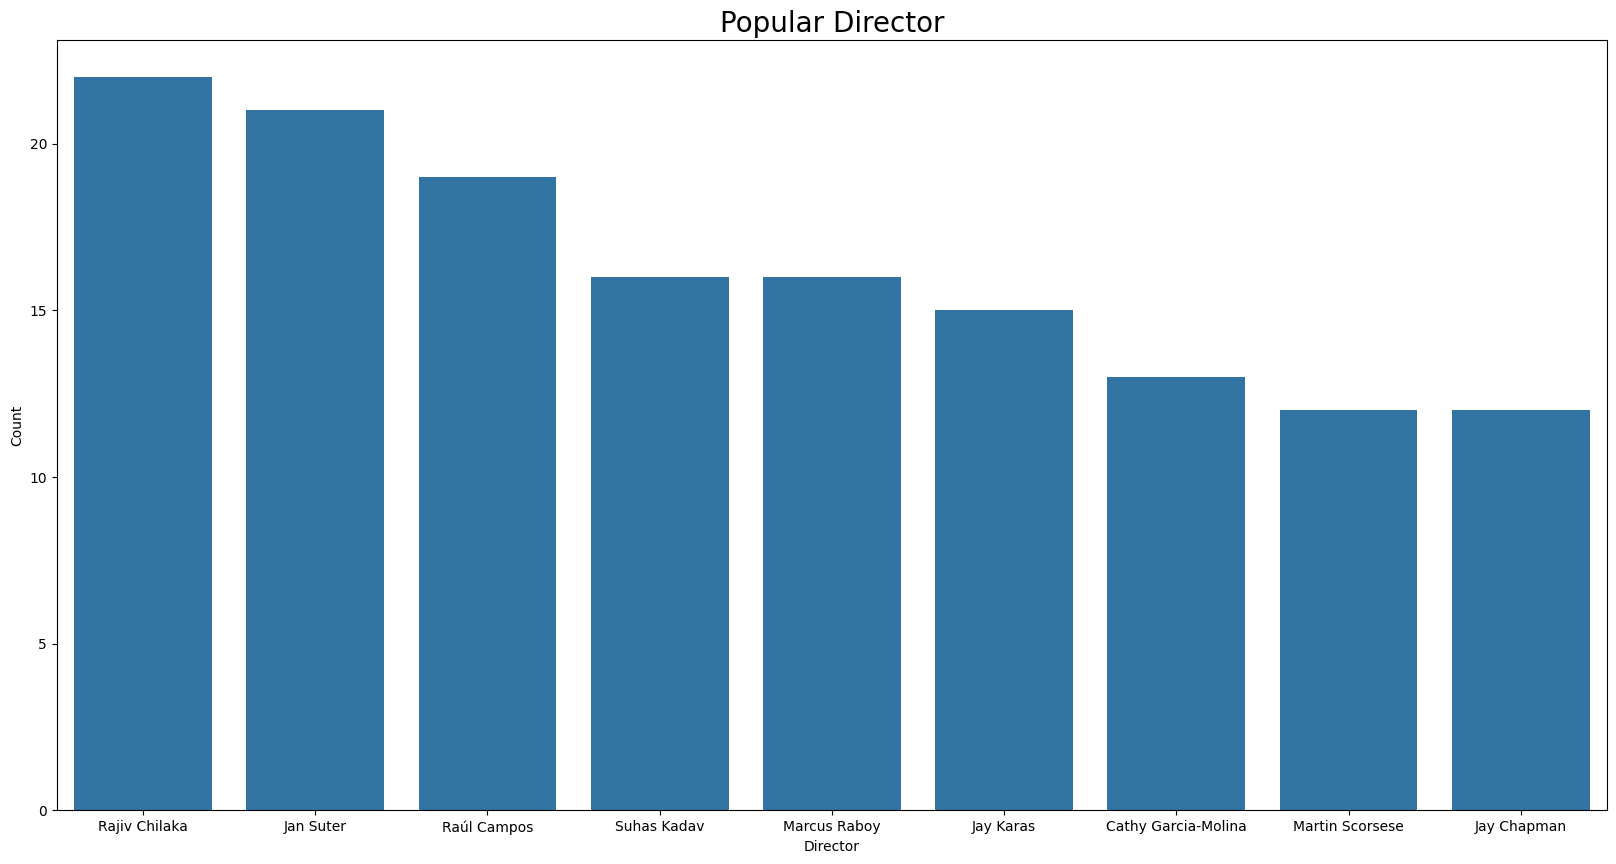

In [ ]:
# Creating Plot
plt.figure(figsize=(20,10))
sns.countplot(data=df_director,x="director",order=df_director["director"].value_counts().index[1:10])

#Adding label and title
plt.xlabel("Director")
plt.ylabel("Count")
plt.title("Popular Director",fontsize=20)

#Display the plot
plt.show()


In [ ]:
df_director[df_director["director"]=="Rajiv Chilaka"]["title"]

441                          Chhota Bheem - Neeli Pahaadi
442                                 Chhota Bheem & Ganesh
443                    Chhota Bheem & Krishna: Mayanagari
444     Chhota Bheem & Krishna: Pataliputra- City of t...
445                    Chhota Bheem And The Broken Amulet
446                Chhota Bheem And The Crown of Valhalla
447                  Chhota Bheem and the Incan Adventure
448                   Chhota Bheem and The ShiNobi Secret
449                              Chhota Bheem Aur Hanuman
450                              Chhota Bheem aur Krishna
451                   Chhota Bheem aur Krishna vs Zimbara
455                         Chhota Bheem: Bheem vs Aliens
456                  Chhota Bheem: Dholakpur to Kathmandu
457                              Chhota Bheem: Dus Pe Dus
459                        Chhota Bheem: Journey to Petra
460                       Chhota Bheem: Master of Shaolin
461                     Chhota Bheem: The Rise of Kirmada
2932          

**Observation**:-
Rajiv Chilaka's "Chhota Bheem" series and movies have garnered immense popularity, particularly captivating the hearts of young audiences across India.

In [ ]:
df_director[(df_director['director']=="Jan Suter") | (df_director['director']=="Raúl Campos")]['country'].value_counts()

Mexico       22
Argentina    10
Chile         4
Colombia      4
Name: country, dtype: int64

In [ ]:
director_23=df_director[(df_director['director']=="Jan Suter") | (df_director['director']=="Raúl Campos")]
director_23.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,Genres,director
5107,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57 min,Stand-Up Comedy,Raúl Campos
5108,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57 min,Stand-Up Comedy,Jan Suter


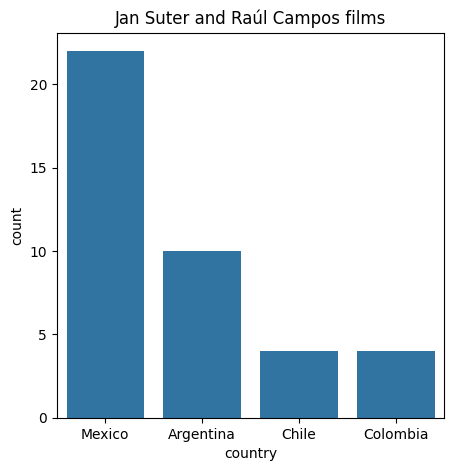

In [ ]:
#Creating Plot
plt.figure(figsize=(5,5))
sns.countplot(data=director_23, x = 'country')

#Adding title
plt.title("Jan Suter and Raúl Campos films")

#Display the plot
plt.show()

#INSIGHTS
**Jan Suter and Raúl Campos** are involved in the creation of populer South American cinemas.


#6. Popularity - Column : cast

In [ ]:
df_cast=data.copy()

In [ ]:
df_stacked=unnest(df_cast,"cast")
df_stacked

,title,0
0,Dick Johnson Is Dead,others
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [ ]:
#Merging two tables
df_cast=df_cast.merge(df_stacked,how="inner",on="title")

In [ ]:
#Droping existing cast column
df_cast.drop(columns=["cast"],inplace=True,axis=1)

In [ ]:
# Rename new col as :="cast"
df_cast.rename(columns={0:"cast"},inplace=True)

In [ ]:
df_cast.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,Genres,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,others
1,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata


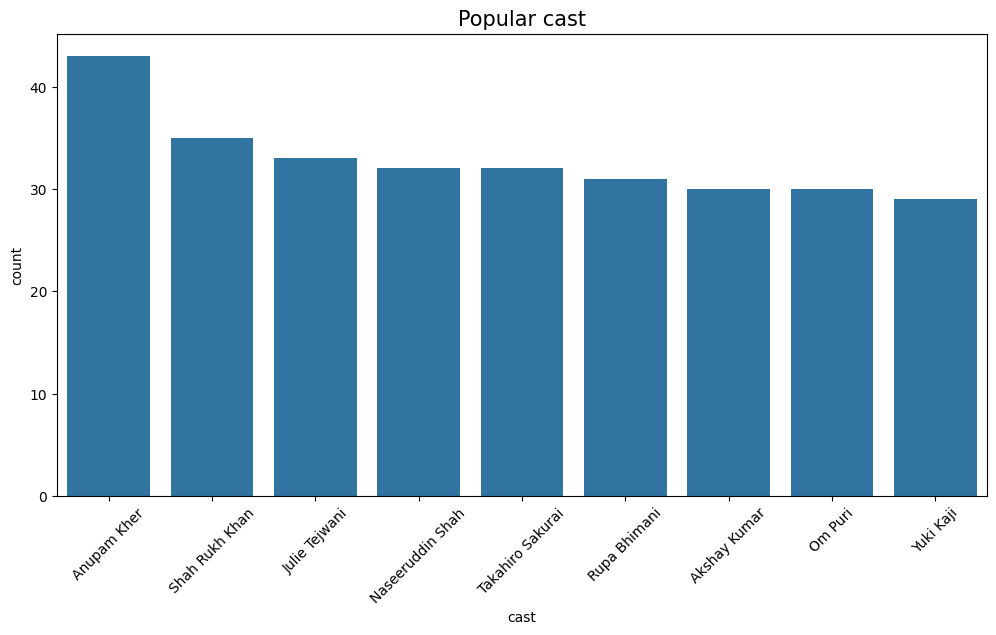

In [ ]:
#creating plot
plt.figure(figsize=(12,6))
sns.countplot(data=df_cast,x="cast",order=df_cast["cast"].value_counts().index[1:10])

#Adding title
plt.title("Popular cast",fontsize=15)

#Rotation x-axis labels to 45 degree
plt.xticks(rotation=45)

#Display the plot
plt.show()

#INSIGHTS


*   Anupam Kher has an extensive filmography, participating in numerous well-known films and TV shows. Following him, Sharukh Khan, Julie Tejwani, and Naseeruddin Shah.


*   In addition to Anupam Kher, Sharukh Khan, Julie Tejwani, and Naseeruddin Shah, Akshay Kumar is also a prominent figure in the entertainment industry, securing a position within the top 10 actors.











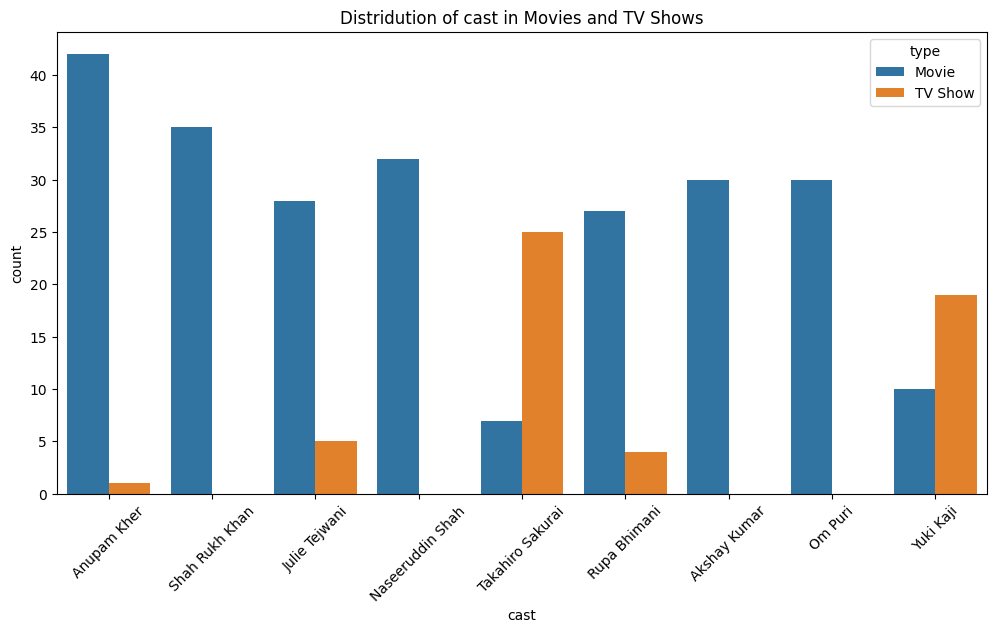

In [ ]:
#creating plot
plt.figure(figsize=(12,6))
sns.countplot(data=df_cast,x="cast",order=df_cast["cast"].value_counts().index[1:10], hue="type")

#Adding label
plt.title("Distridution of cast in Movies and TV Shows")

#Rotating x-axis label to 45 degree
plt.xticks(rotation=45)

#Display Plot
plt.show()

#INSIGHTS

*    It is observed that almost all the top 10 actors except **Takahiro Sakurai and Yuki Kaji** have been casted many times in movies that are popular.
*   **Takahiro Sakurai and Yuki Kaji** stand out among the top 10 actors as they have primarily been cast in television shows, showcasing their significant contributions to the small screen compared to Movies




In [ ]:
movies=df_cast[df_cast["type"]=="Movie"]
series=df_cast[df_cast["type"]=="TV Show"]

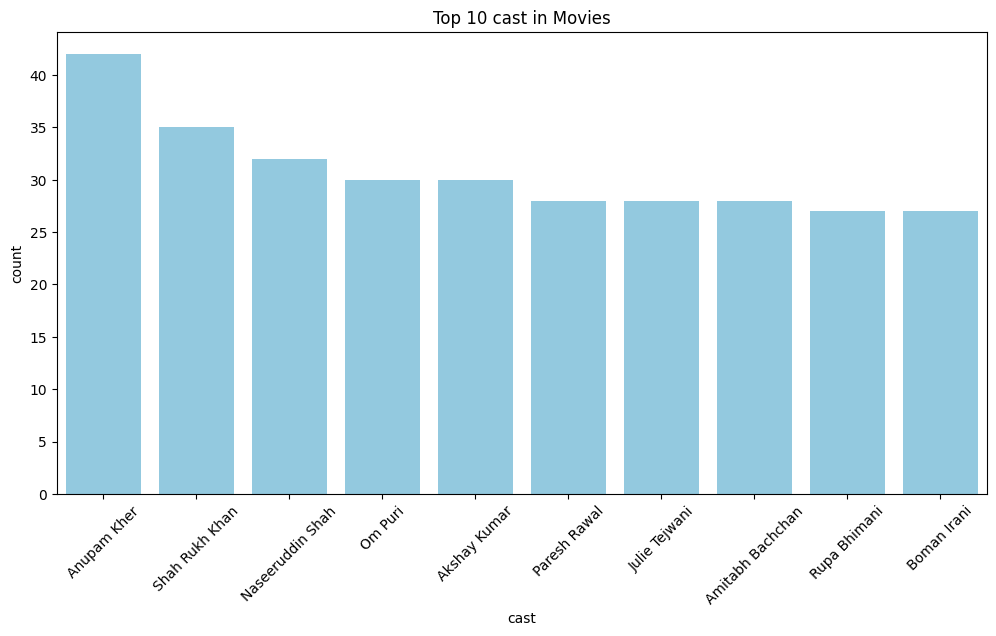

In [ ]:
#Top 10 cast in Movies

#Creating a plot
plt.figure(figsize=(12,6))
sns.countplot(data=movies,x="cast",order=movies["cast"].value_counts().index[1:11],color="skyblue")

#Adding title
plt.title("Top 10 cast in Movies")

#Rotating x-axis label to 45 degree
plt.xticks(rotation=45)

#Display plot
plt.show()

#INSIGHTS

*   **Anupam Kher, Shah Rukh Khan, and Naseeruddin Shah** have consistently been featured in numerous popular TV shows.




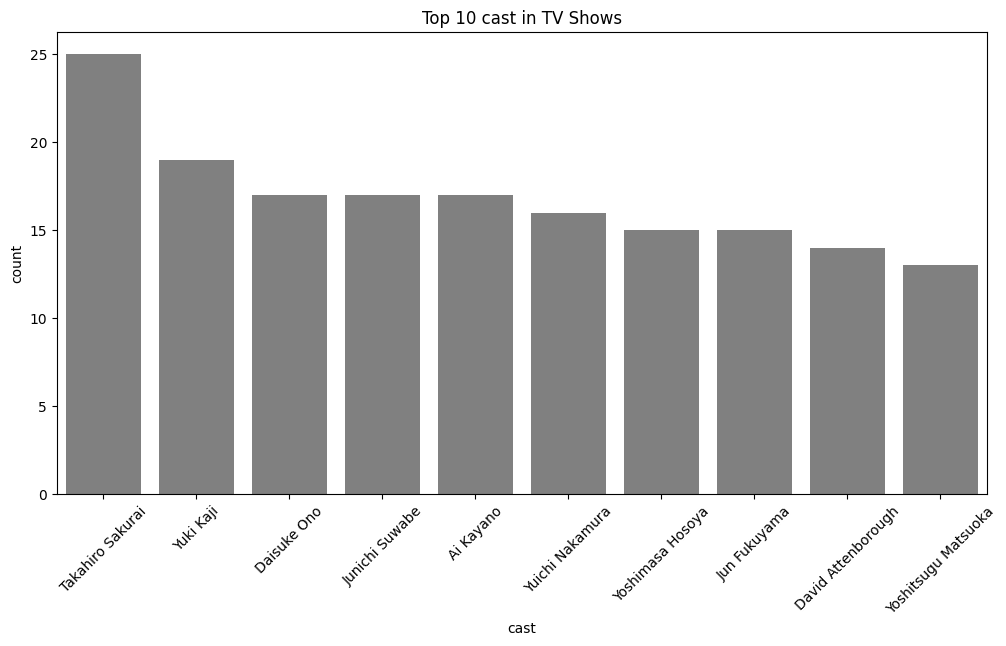

In [ ]:
#Top 10 cast in TV shows
#Creating plot
plt.figure(figsize=(12,6))
sns.countplot(data= series, x= "cast",order = series["cast"].value_counts().index[1:11],color="gray")

#Adding title
plt.title("Top 10 cast in TV Shows")

#Rotating x-axis label to 45 degree
plt.xticks(rotation=45)

#Display Plot
plt.show()

#INSIGHTS

*   **Takahiro Sakurai, Yuki Kaji, and Daisuke Ono** have consistently been
    featured in numerous popular TV shows.



#7. Popularity - Column : release_year

In [ ]:
release_year_movies=movies["release_year"].value_counts().reset_index()[:10]
release_year_movies

,index,release_year
0,2018,5107
1,2017,4789
2,2016,4301
3,2019,4101
4,2020,3681
5,2015,2778
6,2014,1958
7,2021,1876
8,2013,1782
9,2012,1416


In [ ]:
release_year_series=series["release_year"].value_counts().reset_index()[:10]
release_year_series

,index,release_year
0,2019,3386
1,2020,3333
2,2018,2601
3,2021,2350
4,2017,1956
5,2016,1609
6,2015,1215
7,2014,571
8,2013,477
9,2012,449


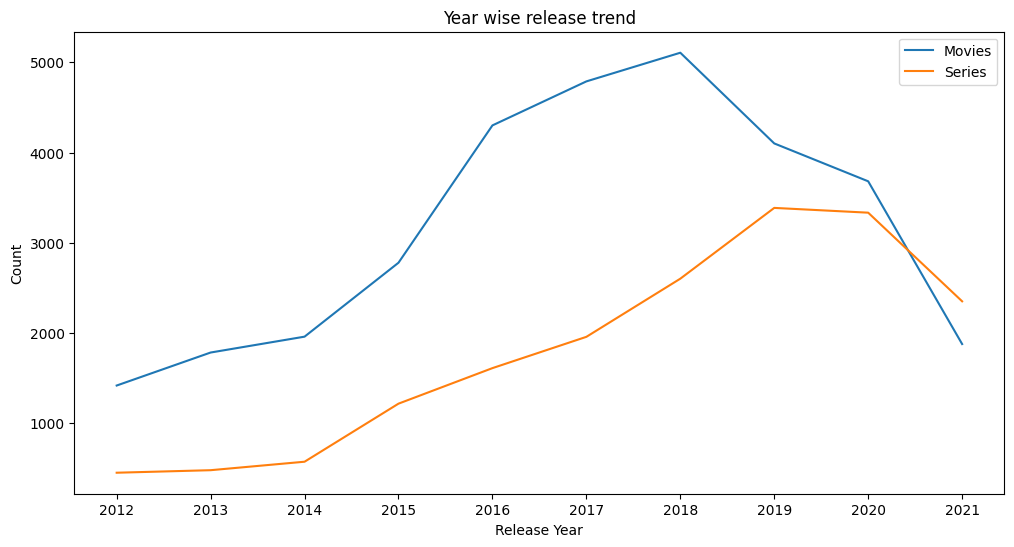

In [ ]:
#Creating plot
plt.figure(figsize=(12,6))
movies=sns.lineplot(data=release_year_movies,x=release_year_movies["index"],y=release_year_movies["release_year"],label="Movies")
series=sns.lineplot(data=release_year_series,x=release_year_series["index"],y=release_year_series["release_year"],label="Series")

#Adding lable,title and label
plt.xticks(release_year_movies["index"])
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Year wise release trend")
plt.legend()

#Display plot
plt.show()


#INSIGHTS


*   **The surge in content production between 2014 and 2018**, this might be due to **widespread accessibility of the internet**, thus with better internet and cheaper plans empowered **users to embrace Over-The-Top (OTT) platforms.**

*   **But after 2019**, popularity takes a slump, **this might be due to the COVID pandemic**, since the entire world was on lockdown, it would have been difficult for the movie/TV show production to happen, Hence **hastily created content are less popular.**



#TV Shows

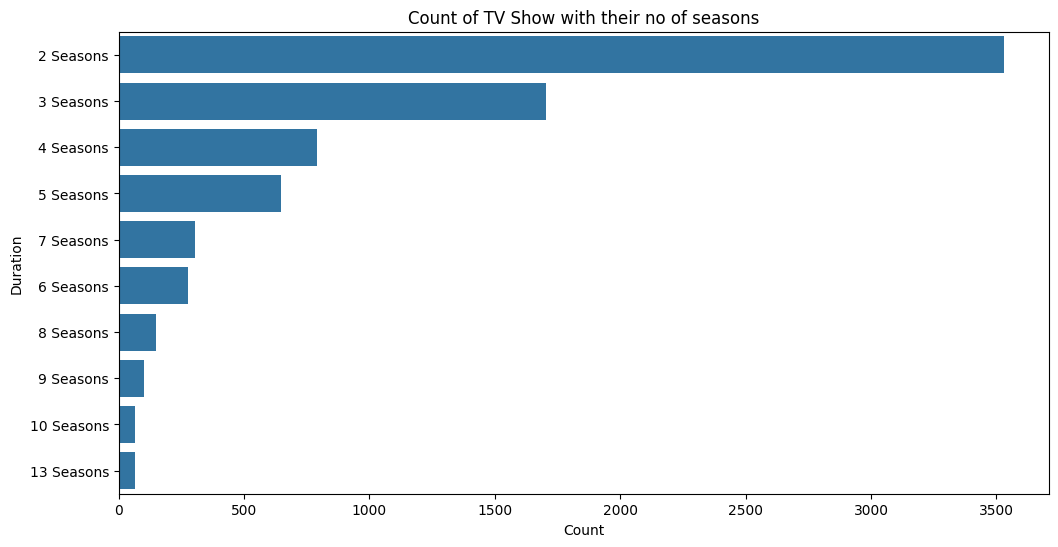

In [ ]:
#Creating plot
plt.figure(figsize=(12,6))
sns.countplot(data=series,y=series["duration"],order=series["duration"].value_counts().index[1:11])

#Adding label and Title
plt.xlabel("Count")
plt.ylabel("Duration")
plt.title("Count of TV Show with their no of seasons")

#Display Plot
plt.show()

#INSIGHTS


*   The trend in TV series durations is characterized by a notable **concentration in the 2 and 3 seasonS range**.



#Daywise content added



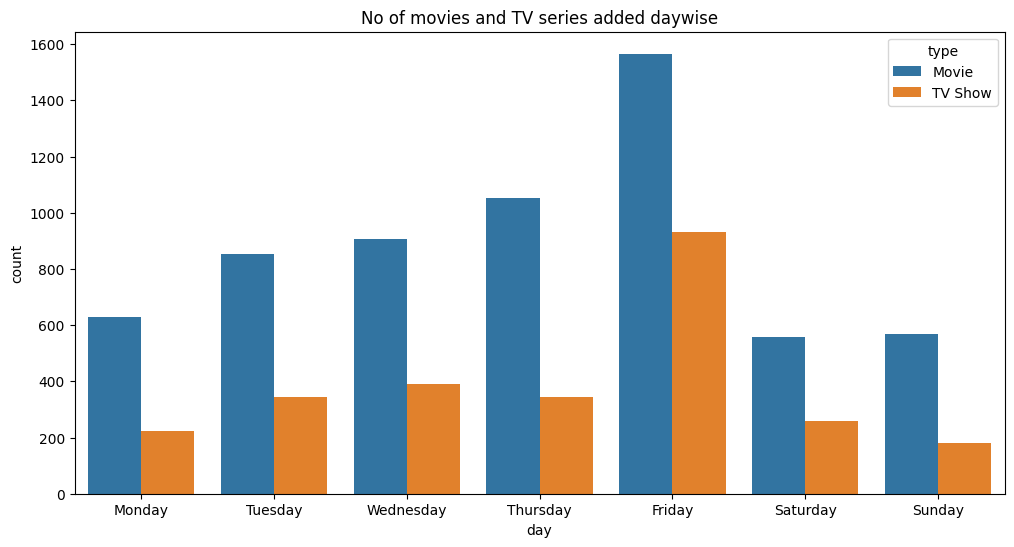

In [ ]:
df_datetime = data
df_datetime['day'] = data.date_added.dt.day_name()
plt.figure(figsize=(12,6))
sns.countplot(x = "day" , data = df_datetime, hue = "type" ,  order=["Monday" , "Tuesday" , "Wednesday", "Thursday", "Friday", "Saturday" ,"Sunday"])
plt.title("No of movies and TV series added daywise")
plt.show()

#INSIGHTS


1.   **Most of the content added on netflix on "Friday"** followed by Thursday as weekend appraohes after these days.





#All Insights and observations



1.   **69.62%** of the total content **are movies** and **30.38% are TV shows**, **Hence Movies are more popular than TV shows.**
2.   **Mature audience TV shows (TV-MA) are more popular** followed by shows for kids of age 14 and above.

1.   It is observed that** United states leads the world in both TV shows and Movies**, India stands second in the list, followed by United kingdom and Japan.
2.   **In India**, it is observed that **movies are more popular** compared to TV shows.

1.   **In South Korea and Japan, TV shows are more popular** compared to movies.
2.   **The directors** producing the most popular shows or movies are **Rajiv Chilaka, Jan Suter and Raul Campos**

1.   **Rajiv Chilaka's Chhota bheem** series and movies are popular in among kids in India.
2.   **Jan Suter and Raúl Campos** make popular **South American films.**

1.   **Anupham Kher** has acted in many popular movies and TV shows, followed by **Sharukh Khan, Julie Tejwani and Naseeruddin Shah.**
2.   **Takahiro Sakurai and Yuki Kaji** have been the cast of many popular **TV shows**.

1.   **The surge in content production between 2014 and 2018**, this might be due to widespread accessibility of the internet, thus with better internet and cheaper plans empowered users to embrace Over-The-Top (OTT) platforms.
2.   **But after 2019, popularity takes a slump**, this might be **due to the COVID pandemic**, since the entire world was on lockdown, it would have been difficult for the movie/TV show production to happen, **Hence hastily created content are less popular.**

1.   **Most** of the popular **TV Shows** are limited **between 1 to 2 seasons.**
















# Recommendations :


1.   Given the prevalence of **movies in Netflix's popular content**, a strategic **focus on increasing movie production is recommended**. This shift can **enhance Netflix's content portfolio** and cater to the preferences of a broader audience.
2.   Considering the heightened **popularity of TV-MA content** for mature audiences and the substantial following of TV-14 content tailored for viewers aged 14 and above, a strategic **recommendation is to amplify Netflix's content production for both adults and kids.**


3.   Given the overwhelming **popularity of movies and TV shows** originating from the **United States** thus a strategic **recommendation is to collaborations with directors and writers** from the United State.
4.   Rajiv Chilaka, animator from India, known for his Chhota bheem franchise for children has the most number of popular content. He is followed by Jan Suter and Raul Campos who make South American Films. Hence it is recommended that, **Netflix can work more on animation content for children and with South American filmakers.**

5.   Films of popular Indian actors namely, Anupham Kher, Sharukh Khan, Naseeruddin Shah are popular on Netflix, Hence it can be inferred that, movies of Classic Indian actors are popular among the audience, Hence **it is recommended that Netflix should have more Movies of well-established Indian actors.**
6.   It is observed that TV shows featuring **Takahiro Sakurai and Yuki Kaji are popular**, Hence netflix can concentrate on working with these Japanese artists due to this **Netflix can enhance its global content offerings and engage a broader audience.**


7.   It is recommended to **limit the number of seasons of TV shows from 1 to 2.**






